# Project for Unsupervised Learning
    
    

**Context:** <br>
In the dataset vehicle-1 we are given various features which describe the outline or shape of the vehicle. There are 3 classes that the vehicles are categorised into: Van, Car or Bus   

**Objective:** <br>
To classify the given features describing the shape of the vehicle as one of the 3 classes mentioned. 

In [123]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix
from scipy.stats import zscore
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
from itertools import cycle

In [56]:
#load the csv file and make the dataframe
df  = pd.read_csv('vehicle-1.csv')

In [57]:
#Getting a glimpse of the head of the dataframe
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [58]:
#Renaming some of the attributes by just replacing the "." with "_" to avoid any errors down the line.
df.rename(columns={'pr.axis_aspect_ratio': 'pr_axis_aspect_ratio', 
                   'max.length_aspect_ratio': 'max_length_aspect_ratio', 
                   'pr.axis_rectangularity': 'pr_axis_rectangularity', 
                   'max.length_rectangularity': 'max_length_rectangularity', 
                   'scaled_variance.1': 'scaled_variance_1', 
                   'scaled_radius_of_gyration.1': 'scaled_radius_of_gyration_1',
                   'skewness_about.1': 'skewness_about_1', 'skewness_about.2': 'skewness_about_2'}, inplace=True)

In [59]:
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about_2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [60]:
#Shape of the data
print("The dataframe has {} rows and {} columns".format(df.shape[0],df.shape[1]))

The dataframe has 846 rows and 19 columns


In [61]:
#Attribute information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr_axis_aspect_ratio         844 non-null    float64
 5   max_length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr_axis_rectangularity       843 non-null    float64
 9   max_length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance_1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

**Observation**: We can see that all attributes are numerical i.e either float or integer except for the class which is object. We can convert the objects in class attribute to numeric as done below.

In [62]:
df = df.replace({'car': 0, 'bus': 1, 'van':2})
df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about_2  hollows_ratio  class  
0             187.0            197      2  
1             189.0            199      2  
2             188.0            196      0  
3             199.0            207      2  
4             180.0            183      1

In [63]:
#fucntion to check how many null values are there
df.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64

**Observation**: We can see that there are missing values present. **The largest number of missing values is 6 in 'radius_ratio'**. We have the option to either drop or impute for the missing values. As dropping is not considered a good practice due to data loss. We will try and impute for the missing values as we proceed to pre-processing.

In [64]:
#5 point summary
vehicle_df.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr.axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr.axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance.1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration.1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about.1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about.2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   
class                        846.0    0.728132    0.818044    0.0    0.00   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr.axis_aspect_ratio          61.0   65.00   138.0  
max.length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr.axis_rectangularity        20.0   23.00    29.0  
max.length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance.1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration.1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about.1              11.0   19.00    41.0  
skewness_about.2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0  
class                          0.0    1.00     2.0

**Observation**: It seams like replacing the missing values with the median is a good option here rather than dropping. 

### Imputing Missing Values 

**Note**: We should make a copy of the dataframe before we start any manipulation. 

In [65]:
vehicle_df = df.copy()

In [66]:
#Fill missing values with the median
vehicle_df.fillna(vehicle_df.median(), axis=0, inplace=True)

In [67]:
#Check for missing values again
vehicle_df.apply(lambda x: sum(x.isnull()))

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

**Observation**: The missing values have been replaced 

<h3>Checking for Outliers

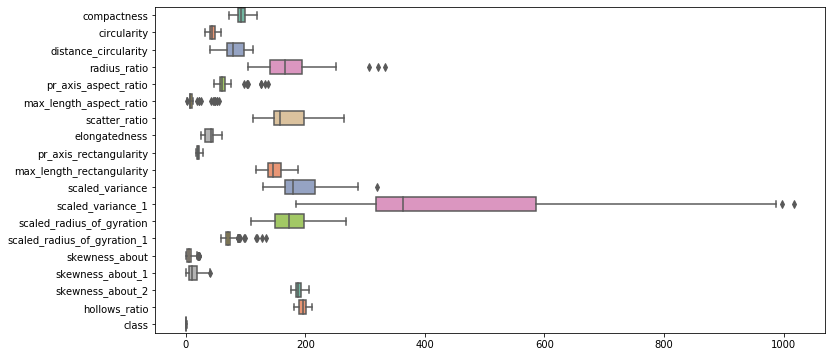

In [68]:
plt.figure(figsize=(12,6))
sns.boxplot(data=vehicle_df, orient='h', palette='Set2', dodge=False)

**Observation**: Outliers exist in some of the attributes. These should be dealt with as we go through visualizing each attribute to get a better understanding.

## Data Visualization

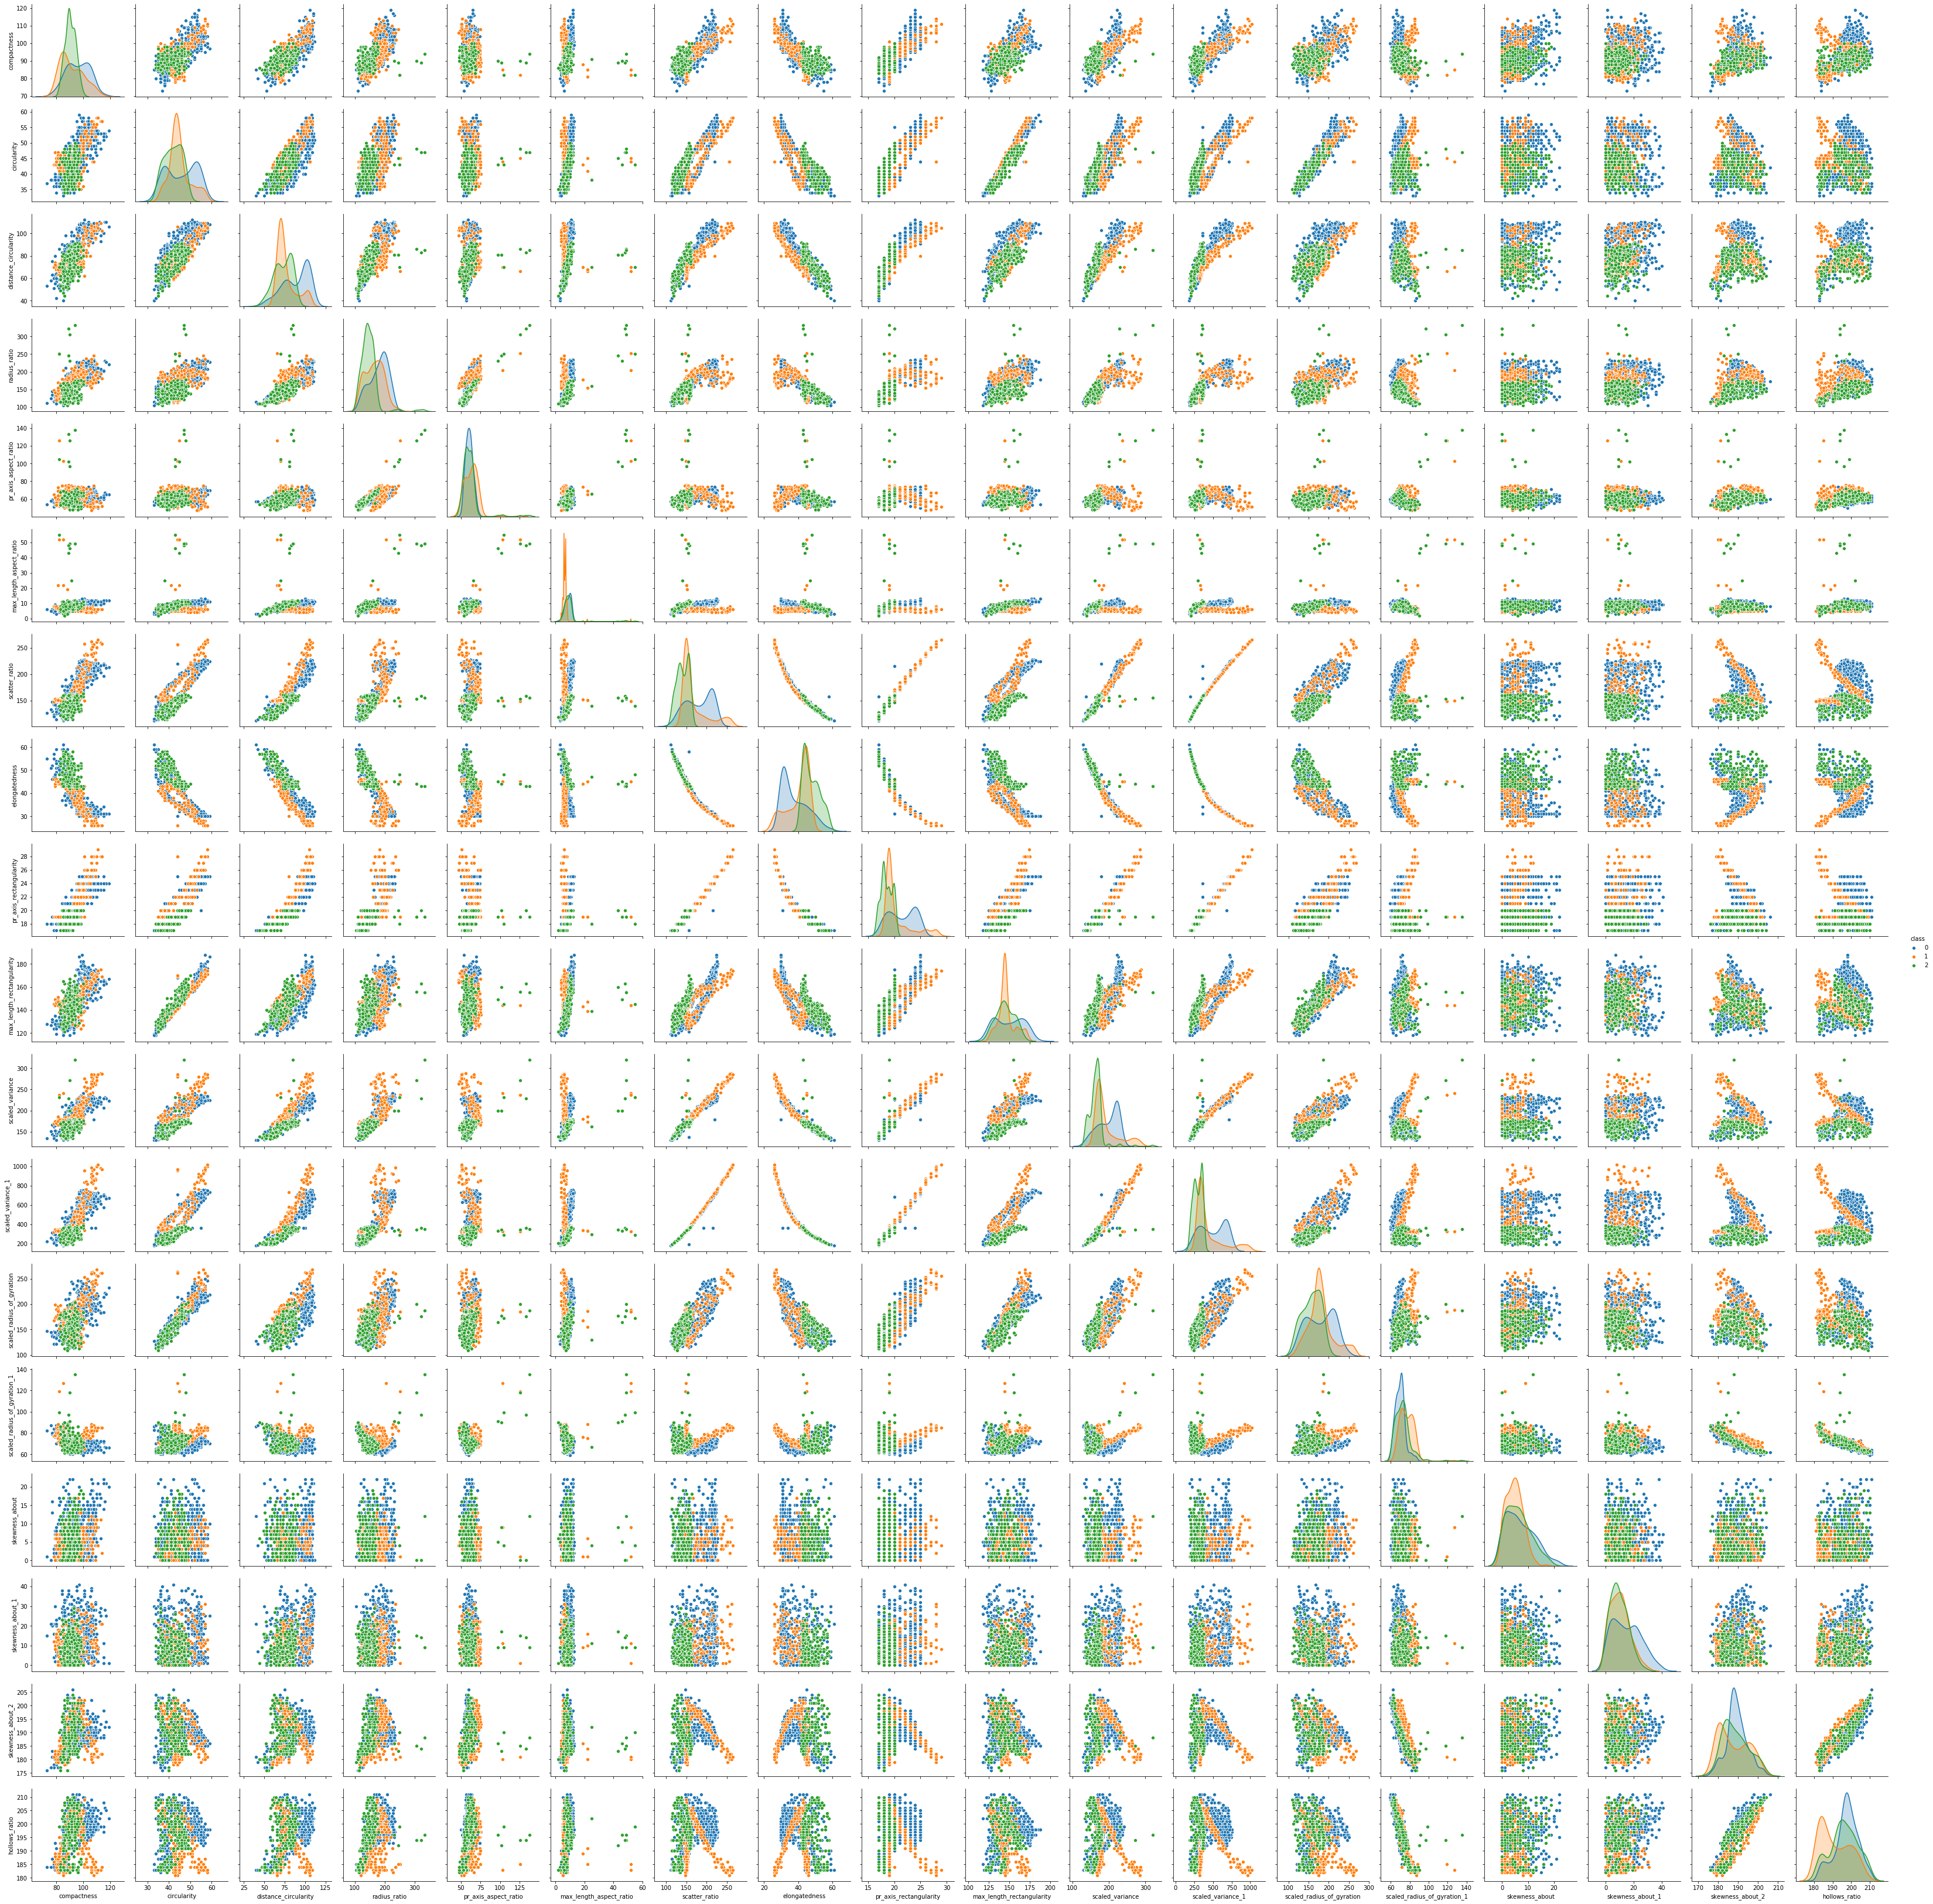

In [69]:
sns.pairplot(vehicle_df, hue='class', diag_kind='kde')

**Observation**: In a broad view, we can see that there are plently correlations between attributes. We can also see that most attributes are normally distributed. Also, the presence of outliers becomes more evident with the presence of tails in the distributions. We need to zoom in to further analyze the relationships. 

### Checking Distribution of Target 

In [70]:
vehicles_counts = pd.DataFrame(vehicle_df['class'].value_counts()).reset_index()
vehicles_counts.columns = ['Labels', 'class']
vehicles_counts['Labels'] = ['Car', 'Bus', 'Van']

In [71]:
vehicles_counts

Labels  class
0    Car    429
1    Bus    218
2    Van    199

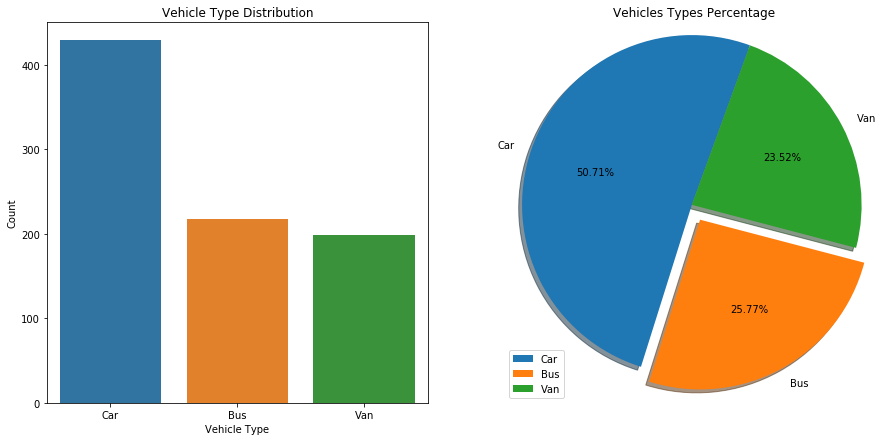

In [72]:
#Visualizing using Histogram & Pie chart

fig, (ax1, ax2) = plt.subplots(nrows=1,ncols=2, figsize=(15,7))
sns.countplot(vehicle_df['class'], ax = ax1)
ax1.set_xlabel('Vehicle Type', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Vehicle Type Distribution')
ax1.set_xticklabels(labels=["Car", 'Bus', 'Van'])

explode = (0, 0.1,0)
ax2.pie(vehicles_counts["class"], explode=explode, labels=["Car", 'Bus', 'Van'], autopct='%1.2f%%',
        shadow=True, startangle=70)
ax2.axis('equal')
plt.title("Vehicles Types Percentage")
plt.legend(["Car", 'Bus', 'Van'], loc=3)
plt.show()

**Observation**: Although pie-charts are not the best visual representation of data in most cases, here we can use it to show how closely the data is split **approx** into 51% for cars and 26% for Bus and 23% for Van. We can see the clear dominance of Cars where the count is more than double of Bus or Van. Also, there is a difference of only 19 counts between Bus and Vans.  

### Analysis of Each Attribute 

We will use distribution plot, box plot as well as a distribution plot with target hue to understand the relationships in depth. Also, we will look at the outliers and try to identify the quantity and ranges where they exist. 

**Compactness**

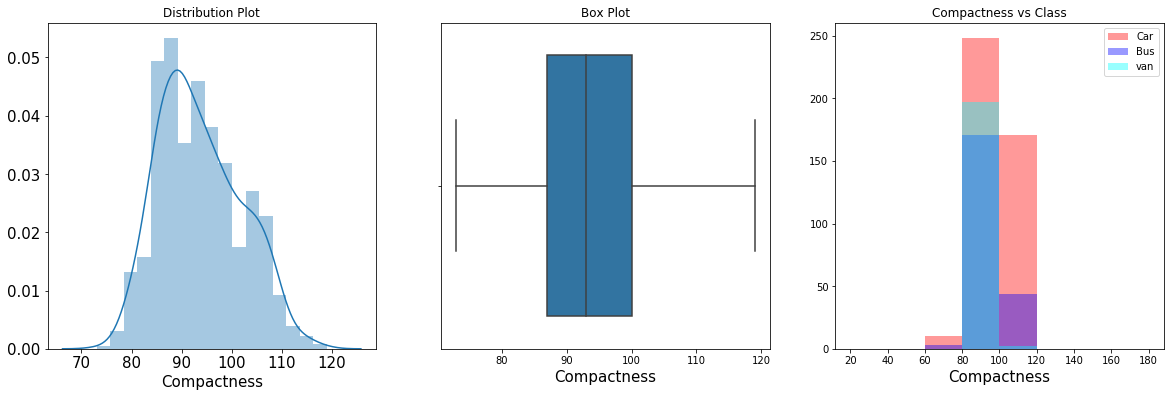

In [73]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['compactness'],ax=ax1)
ax1.tick_params(labelsize=15)
ax1.set_xlabel('Compactness', fontsize=15)
ax1.set_title("Distribution Plot")


sns.boxplot(vehicle_df['compactness'],ax=ax2)
ax2.set_title("Box Plot")
ax2.set_xlabel('Compactness', fontsize=15)


bins = range(20, 200, 20)
ax3 = sns.distplot(vehicle_df.compactness[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.compactness[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.compactness[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Compactness', fontsize=15)
plt.title("Compactness vs Class")
plt.legend()

**Observation**: The distribution looks normal. There are no outliers present. The bulk of the data lies between 80-100 range where as the full spread is somewhere in the 60 - 120 range. From the third plot we can see that more the compactness, the more likely the vehicle is a car. 

**Circularity**

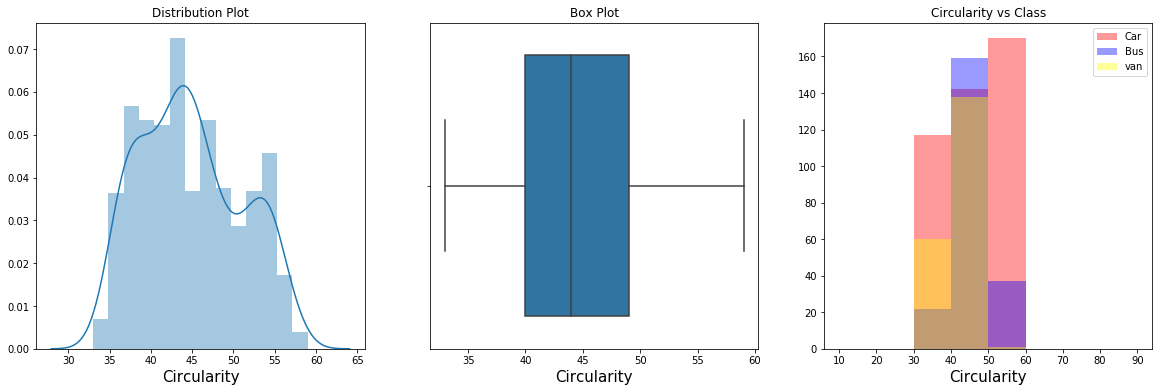

In [74]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['circularity'],ax=ax1)
ax1.set_xlabel('Circularity', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['circularity'],ax=ax2)
ax2.set_xlabel('Circularity', fontsize=15)
ax2.set_title("Box Plot")

bins = range(10, 100, 10)
ax3 = sns.distplot(vehicle_df.circularity[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.circularity[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.circularity[vehicle_df['class']==2],ax=ax3, color='yellow', kde=False, bins=bins, label="van")
ax3.set_xlabel('Circularity', fontsize=15)
plt.title("Circularity vs Class")
plt.legend()

**Observation**: We can see that it is normally distributed. The bulk of the data lies between 40-50 range whereas the entire spread is approx between 30-60. Also, high circularity tends to be a car in most cases than a Bus or a Van. We can also observe that there are almost no vans with circularity higher than 50. 

**Distance Circularity**

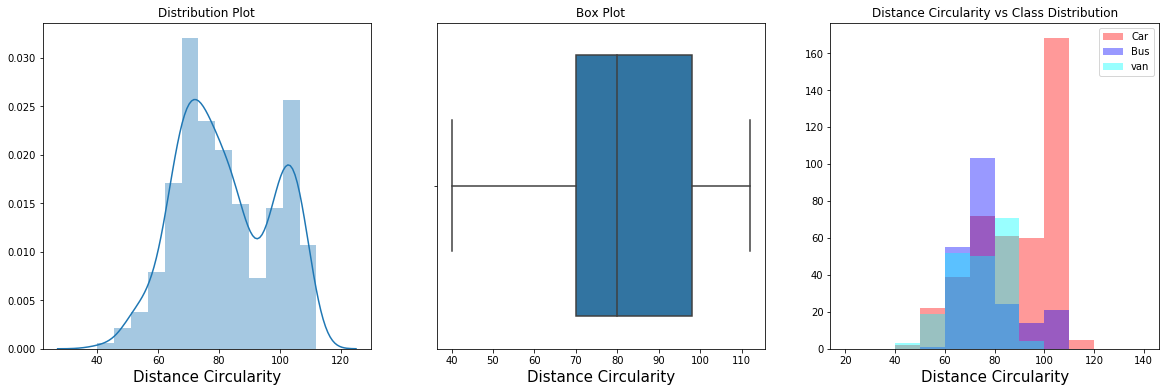

In [75]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['distance_circularity'],ax=ax1)
ax1.set_xlabel('Distance Circularity', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['distance_circularity'],ax=ax2)
ax2.set_xlabel('Distance Circularity', fontsize=15)
ax2.set_title("Box Plot")

bins = range(20, 150, 10)
ax3 = sns.distplot(vehicle_df.distance_circularity[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.distance_circularity[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.distance_circularity[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Distance Circularity', fontsize=15)
plt.title("Distance Circularity vs Class Distribution")
plt.legend()

**Observation**: We can see that the distribution is normal and has 2 peaks. There is a sharp peak in the range 100-110 showing that in this range the vehicle is very likely to be a car. Also, there are no outliers. However, there is a slight left skewness as a longer tail exists on the left side of the boxplot. 

**Radius Ratio**

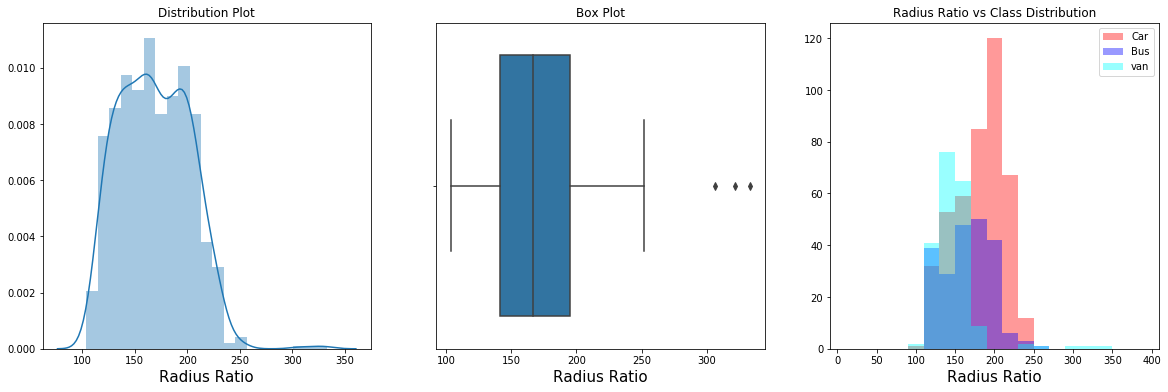

In [76]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['radius_ratio'],ax=ax1)
ax1.set_xlabel('Radius Ratio', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['radius_ratio'],ax=ax2)
ax2.set_xlabel('Radius Ratio', fontsize=15)
ax2.set_title("Box Plot")


bins = range(10, 400, 20)
ax3 = sns.distplot(vehicle_df.radius_ratio[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.radius_ratio[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.radius_ratio[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Radius Ratio', fontsize=15)
plt.title("Radius Ratio vs Class Distribution")
plt.legend()

**Observation**: We can see that some outliears exist which also cause the distribution to have a long tail on the right and right skewness. Let's have a closer look at the outliers. 

In [77]:
#Checking Outliers
outlier_columns = []

Q1 =  vehicle_df['radius_ratio'].quantile(0.25) # 1st Quartile
Q3 =  vehicle_df['radius_ratio'].quantile(0.75) # 3rd Quartile
IQR = Q3 - Q1  # Interquartile range

LTV_radius_ratio = Q1 - 1.5 * IQR   # lower bound 
UTV_radius_ratio = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('radius_ratio <',LTV_radius_ratio ,'and >',UTV_radius_ratio, ' are outliers')
print('Numerber of outliers in radius_ratio column below the lower whisker =', vehicle_df[vehicle_df['radius_ratio'] < (Q1-(1.5*IQR))]['radius_ratio'].count())
print('Numerber of outliers in radius_ratio column above the upper whisker =', vehicle_df[vehicle_df['radius_ratio'] > (Q3+(1.5*IQR))]['radius_ratio'].count())

# storing column name and upper-lower bound value where outliers are present 
outlier_columns.append('radius_ratio')
upperLowerBound_Disct = {'radius_ratio':UTV_radius_ratio}

Interquartile range =  54.0
radius_ratio < 60.0 and > 276.0  are outliers
Numerber of outliers in radius_ratio column below the lower whisker = 0
Numerber of outliers in radius_ratio column above the upper whisker = 3


**Axis Aspect Ratio**

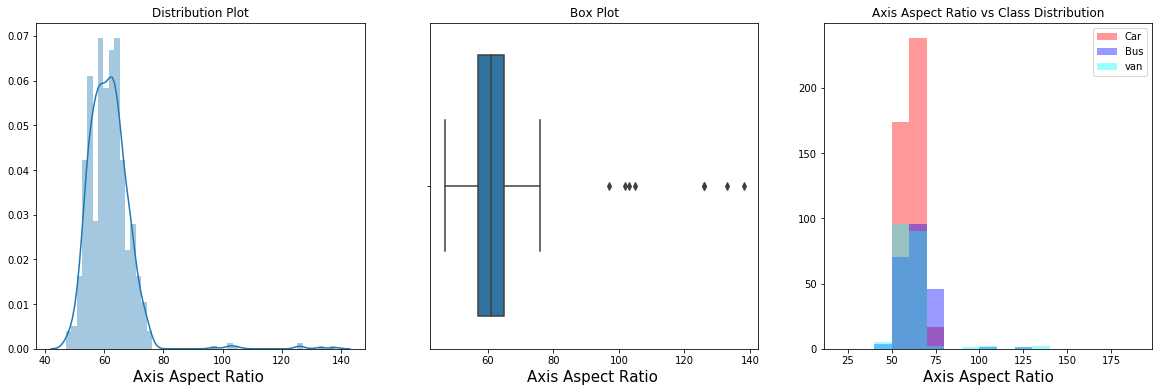

In [78]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['pr_axis_aspect_ratio'],ax=ax1)
ax1.set_xlabel('Axis Aspect Ratio ', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['pr_axis_aspect_ratio'],ax=ax2)
ax2.set_xlabel('Axis Aspect Ratio ', fontsize=15)
ax2.set_title("Box Plot")


bins = range(20, 200, 10)
ax3 = sns.distplot(vehicle_df.pr_axis_aspect_ratio[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.pr_axis_aspect_ratio[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.pr_axis_aspect_ratio[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Axis Aspect Ratio', fontsize=15)
plt.title("Axis Aspect Ratio vs Class Distribution")
plt.legend()

**Observation**: There is a strong right skewness as a fairly long tail exists. This can also be seen as outliers existing in the boxplot. 

In [80]:
#Checking Outliers
Q1 =  vehicle_df['pr_axis_aspect_ratio'].quantile(0.25) # 1st Quartile
Q3 =  vehicle_df['pr_axis_aspect_ratio'].quantile(0.75) # 3rd Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_pr_axis_aspect_ratio = Q1 - 1.5 * IQR   # lower bound 
UTV_pr_axis_aspect_ratio = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('pr_axis_aspect_ratio <',LTV_pr_axis_aspect_ratio ,'and >',UTV_pr_axis_aspect_ratio, ' are outliers')
print('Numerber of outliers in axis_aspect_ratio column below the lower whisker =', vehicle_df[vehicle_df['pr_axis_aspect_ratio'] < (Q1-(1.5*IQR))]['pr_axis_aspect_ratio'].count())
print('Numerber of outliers in axis_aspect_ratio column above the upper whisker =', vehicle_df[vehicle_df['pr_axis_aspect_ratio'] > (Q3+(1.5*IQR))]['pr_axis_aspect_ratio'].count())

# storing column name and upper-lower bound value where outliers are present
outlier_columns.append('pr_axis_aspect_ratio')
upperLowerBound_Disct['pr_axis_aspect_ratio'] = UTV_pr_axis_aspect_ratio

Interquartile range =  8.0
pr_axis_aspect_ratio < 45.0 and > 77.0  are outliers
Numerber of outliers in axis_aspect_ratio column below the lower whisker = 0
Numerber of outliers in axis_aspect_ratio column above the upper whisker = 8


**Max Length Aspect Ratio**

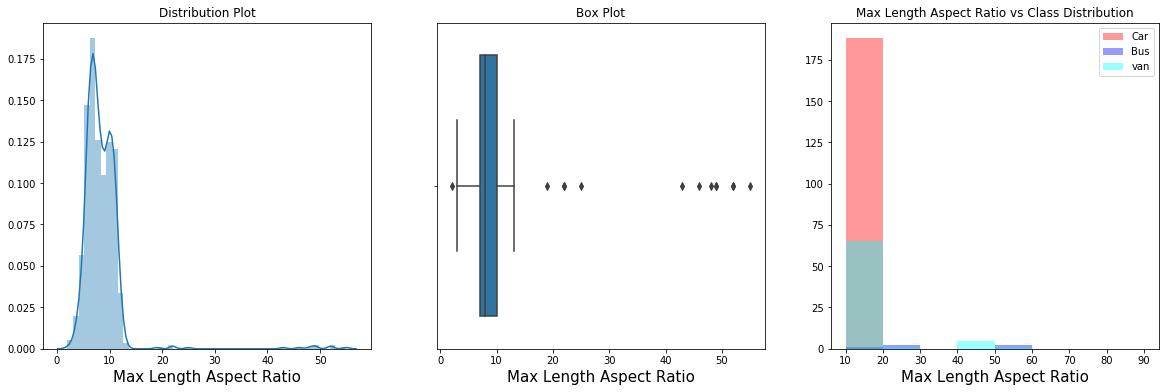

In [85]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['max_length_aspect_ratio'],ax=ax1)
ax1.set_xlabel('Max Length Aspect Ratio', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['max_length_aspect_ratio'],ax=ax2)
ax2.set_xlabel('Max Length Aspect Ratio', fontsize=15)
ax2.set_title("Box Plot")

bins = range(10, 100, 10)
ax3 = sns.distplot(vehicle_df.max_length_aspect_ratio[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.max_length_aspect_ratio[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.max_length_aspect_ratio[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Max Length Aspect Ratio', fontsize=15)
plt.title("Max Length Aspect Ratio vs Class Distribution")
plt.legend()

**Observation**:In this case as well, there is large right skewness due to the many outliers stretching beyond the upper whisker. Most cars have a max lenght aspect ratio between 10-20, whereas busses lies between 

In [86]:
#Checking Outliers
Q1 =  vehicle_df['max_length_aspect_ratio'].quantile(0.25) # 1º Quartile
Q3 =  vehicle_df['max_length_aspect_ratio'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_length_aspect_ratio = Q1 - 1.5 * IQR   # lower bound 
UTV_length_aspect_ratio = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('length_aspect_ratio <',LTV_length_aspect_ratio ,'and >',UTV_length_aspect_ratio, ' are outliers')
print('Numerber of outliers in length_aspect_ratio column below the lower whisker =', 
      vehicle_df[vehicle_df['max_length_aspect_ratio'] < (Q1-(1.5*IQR))]['max_length_aspect_ratio'].count())
print('Numerber of outliers in length_aspect_ratio column above the upper whisker =', 
      vehicle_df[vehicle_df['max_length_aspect_ratio'] > (Q3+(1.5*IQR))]['max_length_aspect_ratio'].count())
outlier_columns.append('max_length_aspect_ratio')

# storing column name and upper-lower bound value where outliers are present
outlier_columns.append(LTV_length_aspect_ratio)
upperLowerBound_Disct['length_aspect_ratio_LTV'] = LTV_length_aspect_ratio
upperLowerBound_Disct['length_aspect_ratio_UTV'] = UTV_length_aspect_ratio

Interquartile range =  3.0
length_aspect_ratio < 2.5 and > 14.5  are outliers
Numerber of outliers in length_aspect_ratio column below the lower whisker = 1
Numerber of outliers in length_aspect_ratio column above the upper whisker = 12


**Scatter Ratio**

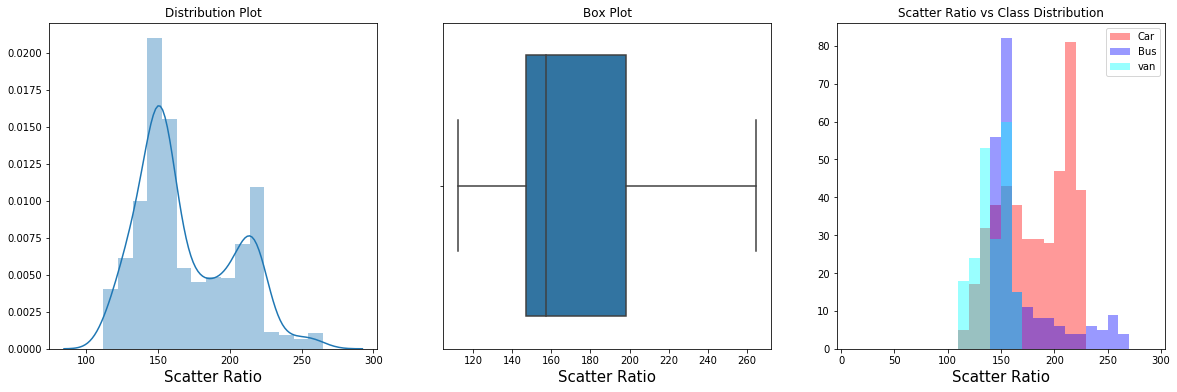

In [87]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['scatter_ratio'],ax=ax1)
ax1.set_xlabel('Scatter Ratio', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['scatter_ratio'],ax=ax2)
ax2.set_xlabel('Scatter Ratio', fontsize=15)
ax2.set_title("Box Plot")

bins = range(10, 300, 10)
ax3 = sns.distplot(vehicle_df.scatter_ratio[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.scatter_ratio[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.scatter_ratio[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Scatter Ratio', fontsize=15)
plt.title("Scatter Ratio vs Class Distribution")
plt.legend()

**Observation**: We can see that there are no outliers in scatter_ratio column and there are two peaks in distribution plot and there is right skewness because long tail is at right side

**Elongatedness**

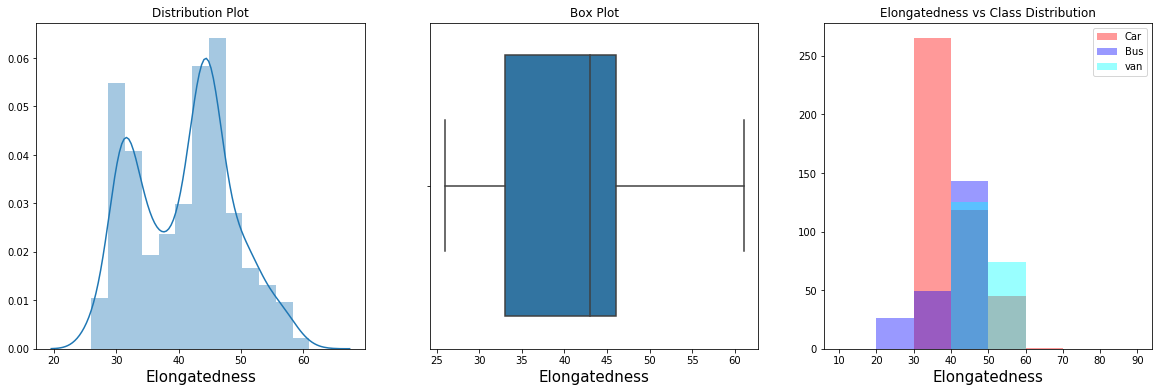

In [88]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['elongatedness'],ax=ax1)
ax1.set_xlabel('Elongatedness', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['elongatedness'],ax=ax2)
ax2.set_xlabel('Elongatedness', fontsize=15)
ax2.set_title("Box Plot")

bins = range(10, 100, 10)
ax3 = sns.distplot(vehicle_df.elongatedness[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.elongatedness[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.elongatedness[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Elongatedness', fontsize=15)
plt.title("Elongatedness vs Class Distribution")
plt.legend()

**Observation**: we can see that there are no outliers in elongatedness column and there are two peaks in distribution plot and there is slight right skewness. Most of the cars elongatedness value ranges between 30 to 40.

**Axis Rectangularity**

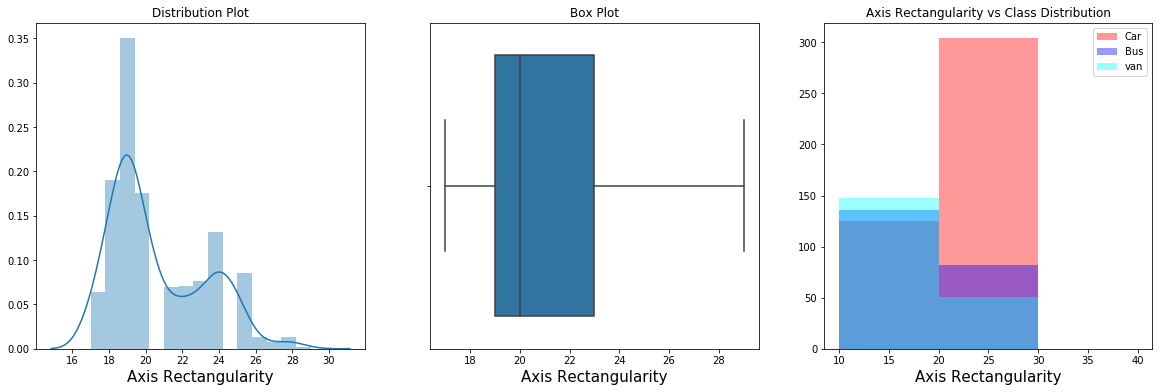

In [89]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['pr_axis_rectangularity'],ax=ax1)
ax1.set_xlabel('Axis Rectangularity', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['pr_axis_rectangularity'],ax=ax2)
ax2.set_xlabel('Axis Rectangularity', fontsize=15)
ax2.set_title("Box Plot")

bins = range(10, 50, 10)
ax3 = sns.distplot(vehicle_df.pr_axis_rectangularity[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.pr_axis_rectangularity[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.pr_axis_rectangularity[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Axis Rectangularity', fontsize=15)
plt.title("Axis Rectangularity vs Class Distribution")
plt.legend()

**Observation**: We can see that there are no outliers in pr.axis_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side.

**Max Length Rectangularity**

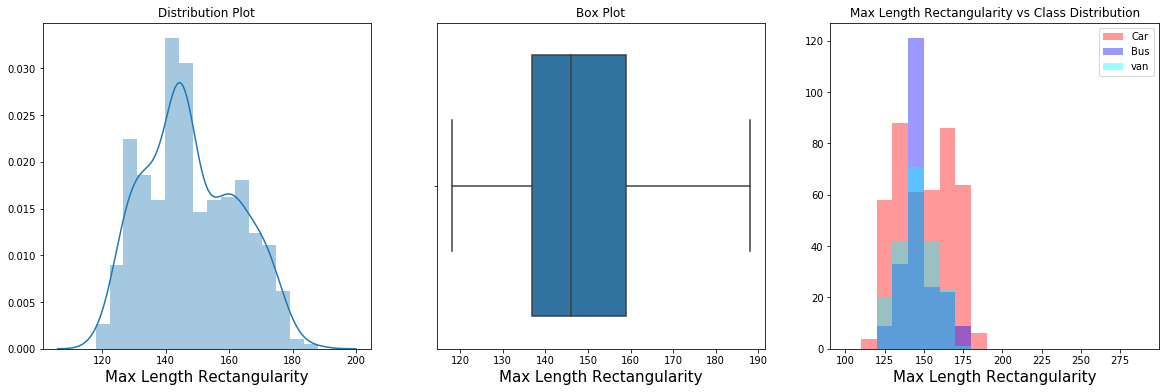

In [90]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['max_length_rectangularity'],ax=ax1)
ax1.set_xlabel('Max Length Rectangularity', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['max_length_rectangularity'],ax=ax2)
ax2.set_xlabel('Max Length Rectangularity', fontsize=15)
ax2.set_title("Box Plot")

bins = range(100, 300, 10)
ax3 = sns.distplot(vehicle_df.max_length_rectangularity[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.max_length_rectangularity[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.max_length_rectangularity[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Max Length Rectangularity', fontsize=15)
plt.title("Max Length Rectangularity vs Class Distribution")
plt.legend()

**Observation**: We can see that there are no outliers in max.length_rectangularity column and there are two peaks in distribution plot and there is right skewness because long tail is at right side

**Scaled Variance**

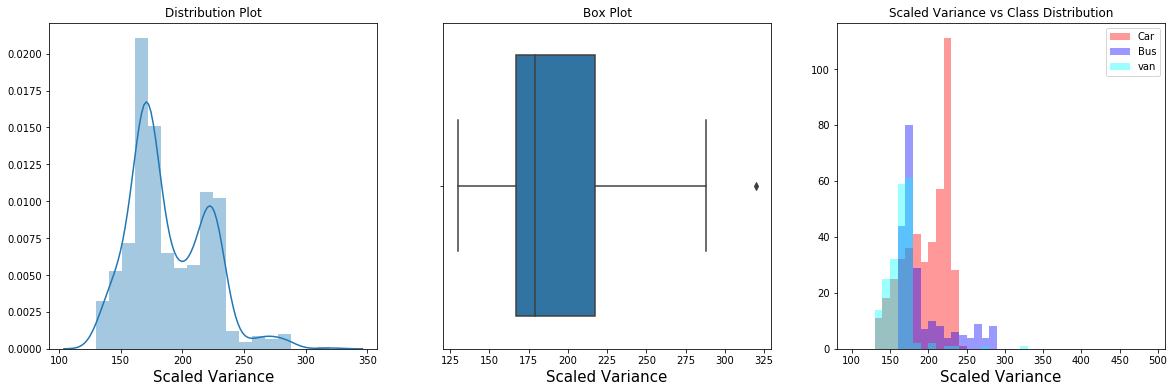

In [91]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['scaled_variance'],ax=ax1)
ax1.set_xlabel('Scaled Variance', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['scaled_variance'],ax=ax2)
ax2.set_xlabel('Scaled Variance', fontsize=15)
ax2.set_title("Box Plot")

bins = range(100, 500, 10)
ax3 = sns.distplot(vehicle_df.scaled_variance[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.scaled_variance[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.scaled_variance[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Scaled Variance', fontsize=15)
plt.title("Scaled Variance vs Class Distribution")
plt.legend()

**Observation**: we can see that there are outliers in scaled_variance column and there are two peaks in distribution plot and there is right skewness because long tail is at right side. Also, there is a peak around 220-240 range with large number of car. 

In [92]:
#Checking Outliers
Q1 =  vehicle_df['scaled_variance'].quantile(0.25) # 1º Quartile
Q3 =  vehicle_df['scaled_variance'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_scaled_variance = Q1 - 1.5 * IQR   # lower bound 
UTV_scaled_variance = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('scaled_variance <',LTV_scaled_variance ,'and >',UTV_scaled_variance, ' are outliers')
print('Numerber of outliers in scaled_variance column below the lower whisker =', 
      vehicle_df[vehicle_df['scaled_variance'] < (Q1-(1.5*IQR))]['scaled_variance'].count())
print('Numerber of outliers in scaled_variance column above the upper whisker =', 
      vehicle_df[vehicle_df['scaled_variance'] > (Q3+(1.5*IQR))]['scaled_variance'].count())

# storing column name and upper-lower bound value where outliers are present
outlier_columns.append('scaled_variance')
upperLowerBound_Disct['scaled_variance'] = UTV_scaled_variance

Interquartile range =  50.0
scaled_variance < 92.0 and > 292.0  are outliers
Numerber of outliers in scaled_variance column below the lower whisker = 0
Numerber of outliers in scaled_variance column above the upper whisker = 1


**Scaled Variance_1**

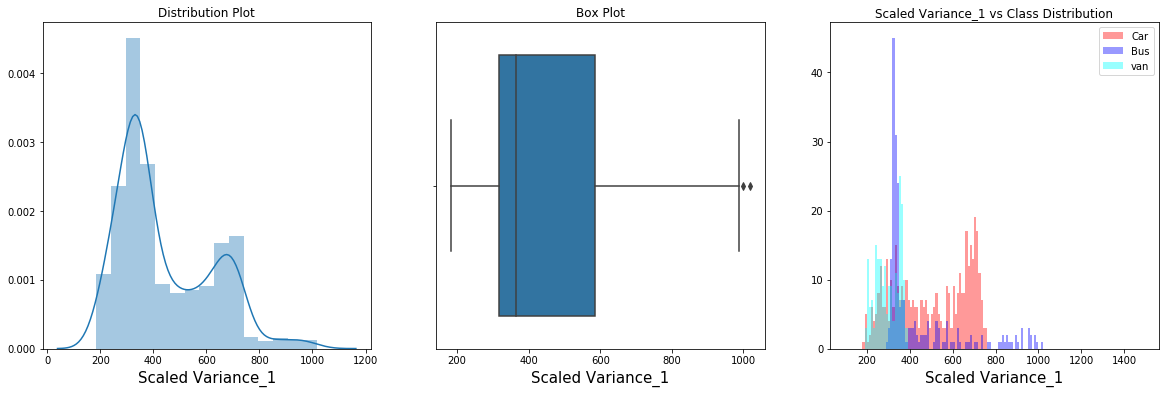

In [93]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['scaled_variance_1'],ax=ax1)
ax1.set_xlabel('Scaled Variance_1', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['scaled_variance_1'],ax=ax2)
ax2.set_xlabel('Scaled Variance_1', fontsize=15)
ax2.set_title("Box Plot")

bins = range(100, 1500, 10)
ax3 = sns.distplot(vehicle_df.scaled_variance_1[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.scaled_variance_1[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.scaled_variance_1[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Scaled Variance_1', fontsize=15)
plt.title("Scaled Variance_1 vs Class Distribution")
plt.legend()

**Observation**: We can see that there are outliers in scaled_variance.1 column and there are two peaks in distribution plot and there is right skewness because long tail is at right side.

In [94]:
#Checking outliers
Q1 =  vehicle_df['scaled_variance_1'].quantile(0.25) # 1º Quartile
Q3 =  vehicle_df['scaled_variance_1'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_scaled_variance_1 = Q1 - 1.5 * IQR   # lower bound 
UTV_scaled_variance_1 = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('scaled_variance_1 <',LTV_scaled_variance_1 ,'and >',UTV_scaled_variance_1, ' are outliers')
print('Numerber of outliers in scaled_variance_1 column below the lower whisker =', 
      vehicle_df[vehicle_df['scaled_variance_1'] < (Q1-(1.5*IQR))]['scaled_variance_1'].count())
print('Numerber of outliers in scaled_variance_1 column above the upper whisker =', 
      vehicle_df[vehicle_df['scaled_variance_1'] > (Q3+(1.5*IQR))]['scaled_variance_1'].count())

# storing column name and upper-lower bound value where outliers are present
outlier_columns.append('scaled_variance_1')
upperLowerBound_Disct['scaled_variance_1'] = UTV_scaled_variance_1

Interquartile range =  268.5
scaled_variance_1 < -84.5 and > 989.5  are outliers
Numerber of outliers in scaled_variance_1 column below the lower whisker = 0
Numerber of outliers in scaled_variance_1 column above the upper whisker = 2


**Scaled Radius of Gyration**

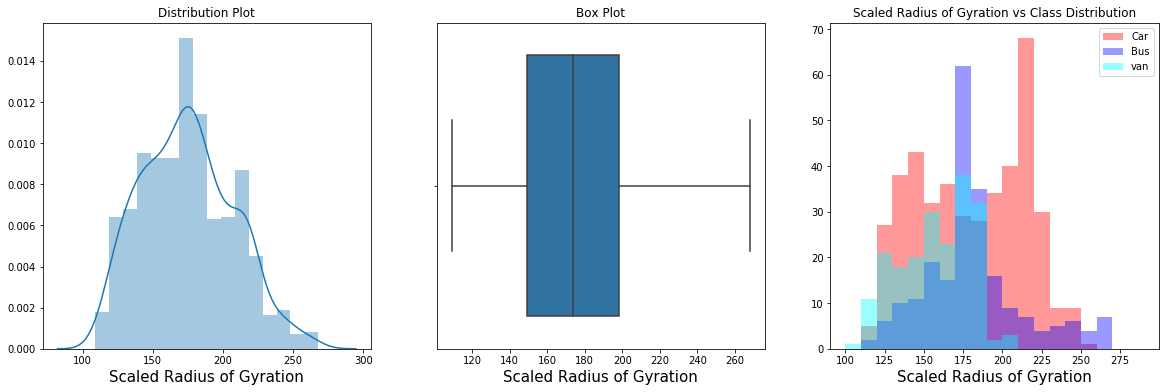

In [95]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['scaled_radius_of_gyration'],ax=ax1)
ax1.set_xlabel('Scaled Radius of Gyration', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['scaled_radius_of_gyration'],ax=ax2)
ax2.set_xlabel('Scaled Radius of Gyration', fontsize=15)
ax2.set_title("Box Plot")

bins = range(100, 300, 10)
ax3 = sns.distplot(vehicle_df.scaled_radius_of_gyration[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.scaled_radius_of_gyration[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.scaled_radius_of_gyration[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Scaled Radius of Gyration', fontsize=15)
plt.title("Scaled Radius of Gyration vs Class Distribution")
plt.legend()


**Observation**: We can see that there are no outliers in scaled_radius_of_gyration column and there is right skewness because long tail is at right side.

**Scaled Radius of Gyration_1**

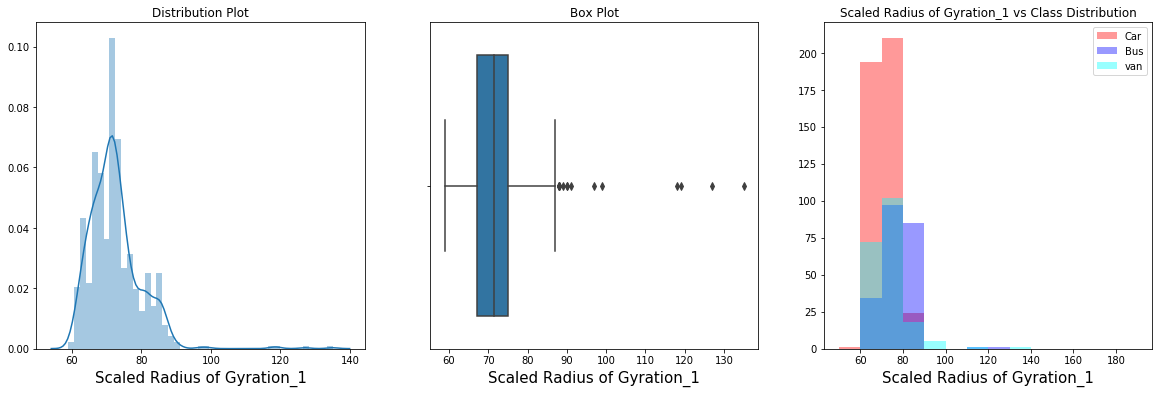

In [96]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['scaled_radius_of_gyration_1'],ax=ax1)
ax1.set_xlabel('Scaled Radius of Gyration_1', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['scaled_radius_of_gyration_1'],ax=ax2)
ax2.set_xlabel('Scaled Radius of Gyration_1', fontsize=15)
ax2.set_title("Box Plot")

bins = range(50, 200, 10)
ax3 = sns.distplot(vehicle_df.scaled_radius_of_gyration_1[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.scaled_radius_of_gyration_1[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.scaled_radius_of_gyration_1[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Scaled Radius of Gyration_1', fontsize=15)
plt.title("Scaled Radius of Gyration_1 vs Class Distribution")
plt.legend()

**Observation**: We can see that there are outliers in scaled_radius_of_gyration.1 column and there is right skewness because long tail is at right side.

In [97]:
#Checking for Outliers
Q1 =  vehicle_df['scaled_radius_of_gyration_1'].quantile(0.25) # 1º Quartile
Q3 =  vehicle_df['scaled_radius_of_gyration_1'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_scaled_radius_of_gyration_1 = Q1 - 1.5 * IQR   # lower bound 
UTV_scaled_radius_of_gyration_1 = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('scaled_radius_of_gyration_1 <',LTV_scaled_radius_of_gyration_1 ,'and >',UTV_scaled_radius_of_gyration_1, ' are outliers')
print('Numerber of outliers in scaled_radius_of_gyration_1 column below the lower whisker =', 
      vehicle_df[vehicle_df['scaled_radius_of_gyration_1'] < (Q1-(1.5*IQR))]['scaled_radius_of_gyration_1'].count())
print('Numerber of outliers in scaled_radius_of_gyration_1 column above the upper whisker =', 
      vehicle_df[vehicle_df['scaled_radius_of_gyration_1'] > (Q3+(1.5*IQR))]['scaled_radius_of_gyration_1'].count())


# storing column name and upper-lower bound value where outliers are present
outlier_columns.append('scaled_radius_of_gyration_1')
upperLowerBound_Disct['scaled_radius_of_gyration_1'] = UTV_scaled_radius_of_gyration_1

Interquartile range =  8.0
scaled_radius_of_gyration_1 < 55.0 and > 87.0  are outliers
Numerber of outliers in scaled_radius_of_gyration_1 column below the lower whisker = 0
Numerber of outliers in scaled_radius_of_gyration_1 column above the upper whisker = 15


**Skewness About**

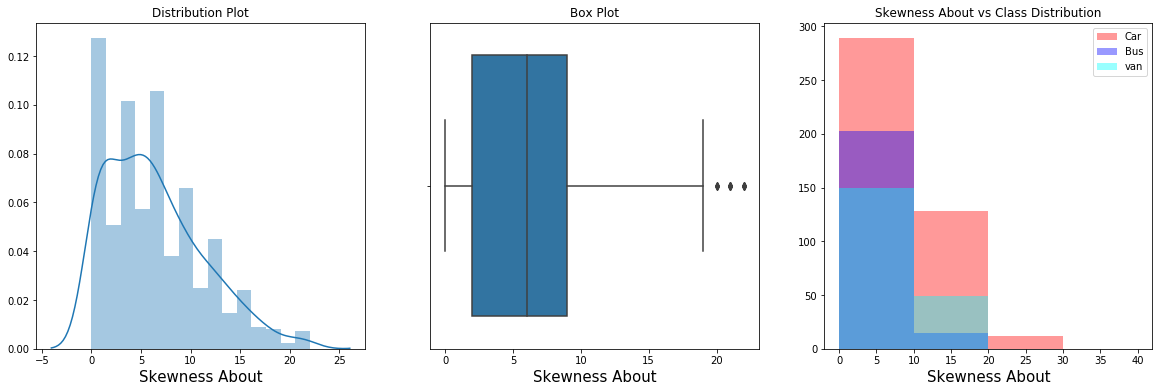

In [98]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['skewness_about'],ax=ax1)
ax1.set_xlabel('Skewness About', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['skewness_about'],ax=ax2)
ax2.set_xlabel('Skewness About', fontsize=15)
ax2.set_title("Box Plot")

bins = range(0, 50, 10)
ax3 = sns.distplot(vehicle_df.skewness_about[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.skewness_about[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.skewness_about[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Skewness About', fontsize=15)
plt.title("Skewness About vs Class Distribution")
plt.legend()

**Observation**: We can see that there are outliers in skewness_about column and there is right skewness because long tail is at right side

In [99]:
#Cheecking for Outliers
Q1 =  vehicle_df['skewness_about'].quantile(0.25) # 1º Quartile
Q3 =  vehicle_df['skewness_about'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_skewness_about = Q1 - 1.5 * IQR   # lower bound 
UTV_skewness_about = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('skewness_about <',LTV_skewness_about ,'and >',UTV_skewness_about, ' are outliers')
print('Numerber of outliers in skewness_about column below the lower whisker =', 
      vehicle_df[vehicle_df['skewness_about'] < (Q1-(1.5*IQR))]['skewness_about'].count())
print('Numerber of outliers in skewness_about column above the upper whisker =', 
      vehicle_df[vehicle_df['skewness_about'] > (Q3+(1.5*IQR))]['skewness_about'].count())

# storing column name and upper-lower bound value where outliers are present
outlier_columns.append('skewness_about')
upperLowerBound_Disct['skewness_about'] = UTV_skewness_about

Interquartile range =  7.0
skewness_about < -8.5 and > 19.5  are outliers
Numerber of outliers in skewness_about column below the lower whisker = 0
Numerber of outliers in skewness_about column above the upper whisker = 12


**Skewness About_1**

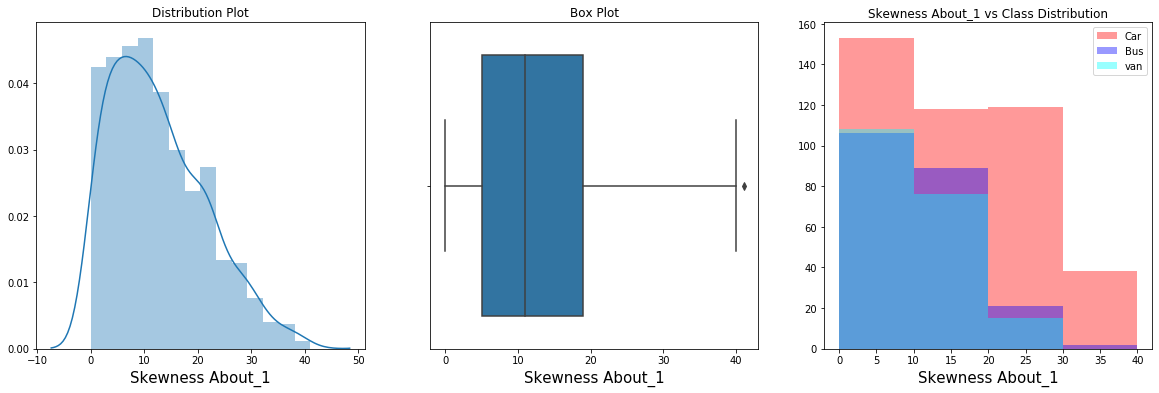

In [100]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['skewness_about_1'],ax=ax1)
ax1.set_xlabel('Skewness About_1', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['skewness_about_1'],ax=ax2)
ax2.set_xlabel('Skewness About_1', fontsize=15)
ax2.set_title("Box Plot")

bins = range(0, 50, 10)
ax3 = sns.distplot(vehicle_df.skewness_about_1[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.skewness_about_1[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.skewness_about_1[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Skewness About_1', fontsize=15)
plt.title("Skewness About_1 vs Class Distribution")
plt.legend()

**Observation**: We can see that there are outliers in skewness_about.1 column and there is right skewness because long tail is at right side.

In [102]:
#Checking Outliers
Q1 =  vehicle_df['skewness_about_1'].quantile(0.25) # 1º Quartile
Q3 =  vehicle_df['skewness_about_1'].quantile(0.75) # 3º Quartile
IQR = Q3 - Q1                      # Interquartile range

LTV_skewness_about_1 = Q1 - 1.5 * IQR   # lower bound 
UTV_skewness_about_1 = Q3 + 1.5 * IQR   # upper bound

print('Interquartile range = ', IQR)
print('skewness_about_1 <',LTV_skewness_about_1 ,'and >',UTV_skewness_about_1, ' are outliers')
print('Numerber of outliers in skewness_about_1 column below the lower whisker =', 
      vehicle_df[vehicle_df['skewness_about_1'] < (Q1-(1.5*IQR))]['skewness_about_1'].count())
print('Numerber of outliers in skewness_about_1 column above the upper whisker =', 
      vehicle_df[vehicle_df['skewness_about_1'] > (Q3+(1.5*IQR))]['skewness_about_1'].count())

# storing column name and upper-lower bound value where outliers are presense
outlier_columns.append('skewness_about_1')
upperLowerBound_Disct['skewness_about_1'] = UTV_skewness_about_1

Interquartile range =  14.0
skewness_about_1 < -16.0 and > 40.0  are outliers
Numerber of outliers in skewness_about_1 column below the lower whisker = 0
Numerber of outliers in skewness_about_1 column above the upper whisker = 1


**Skewness About_2**

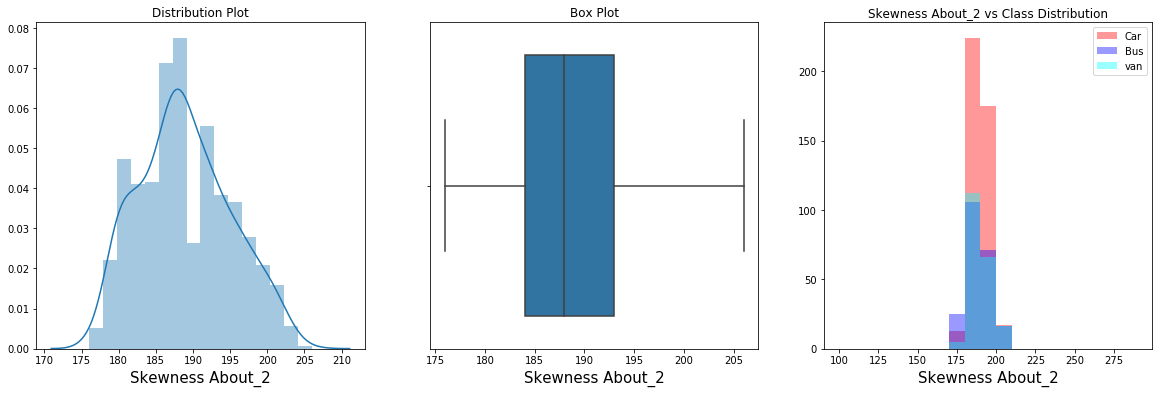

In [103]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['skewness_about_2'],ax=ax1)
ax1.set_xlabel('Skewness About_2', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['skewness_about_2'],ax=ax2)
ax2.set_xlabel('Skewness About_2', fontsize=15)
ax2.set_title("Box Plot")

bins = range(100, 300, 10)
ax3 = sns.distplot(vehicle_df.skewness_about_2[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.skewness_about_2[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.skewness_about_2[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Skewness About_2', fontsize=15)
plt.title("Skewness About_2 vs Class Distribution")
plt.legend()

**Observation**: We can see that there are no outliers in skewness_about.2 column and there is left skewness because long tail is at left side.

**Hollows Ratio**

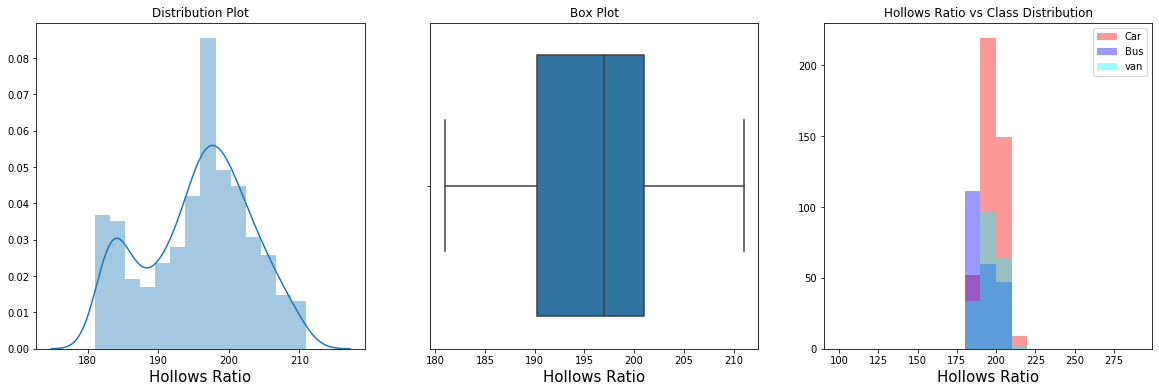

In [104]:
fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
fig.set_size_inches(20,6)
sns.distplot(vehicle_df['hollows_ratio'],ax=ax1)
ax1.set_xlabel('Hollows Ratio', fontsize=15)
ax1.set_title("Distribution Plot")

sns.boxplot(vehicle_df['hollows_ratio'],ax=ax2)
ax2.set_xlabel('Hollows Ratio', fontsize=15)
ax2.set_title("Box Plot")


#fig, (ax1, ax2, x3) = plt.subplots(nrows = 1, ncols = 3, figsize = (13, 5))
#ax3.set_xlabel('Distance Circularity', fontsize=15)
bins = range(100, 300, 10)
ax3 = sns.distplot(vehicle_df.hollows_ratio[vehicle_df['class']==0], color='red', kde=False, bins=bins, label='Car')
sns.distplot(vehicle_df.hollows_ratio[vehicle_df['class']==1],ax=ax3, color='blue', kde=False, bins=bins, label="Bus")
sns.distplot(vehicle_df.hollows_ratio[vehicle_df['class']==2],ax=ax3, color='cyan', kde=False, bins=bins, label="van")
ax3.set_xlabel('Hollows Ratio', fontsize=15)
plt.title("Hollows Ratio vs Class Distribution")
plt.legend()

**Observation**: There are no outliers in hollows_ratio column and there is left skewness because long tail is at left side.

### Eliminating Outliers

In [105]:
print('These are the columns which have outliers : \n\n',outlier_columns)
print('\n\n',upperLowerBound_Disct)

These are the columns which have outliers : 

 ['radius_ratio', 'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 2.5, 'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1']


 {'radius_ratio': 276.0, 'pr_axis_aspect_ratio': 77.0, 'length_aspect_ratio_LTV': 2.5, 'length_aspect_ratio_UTV': 14.5, 'scaled_variance': 292.0, 'scaled_variance_1': 989.5, 'scaled_radius_of_gyration_1': 87.0, 'skewness_about': 19.5, 'skewness_about_1': 40.0}


We can replace the outliers with the respective medians because if we drop them then there may be loss of information. As always before manipulating the dataframe, we will create a new copy of it. 

In [106]:
#Copy new dataframe
vehicle_df_new = vehicle_df.copy()

In [107]:
#Replace outliers with medians
for col_name in vehicle_df_new.columns[:-1]:
    q1 = vehicle_df_new[col_name].quantile(0.25)
    q3 = vehicle_df_new[col_name].quantile(0.75)
    iqr = q3 - q1
    low = q1-1.5*iqr
    high = q3+1.5*iqr
    
    vehicle_df_new.loc[(vehicle_df_new[col_name] < low) | (vehicle_df_new[col_name] > high), col_name] = vehicle_df_new[col_name].median()

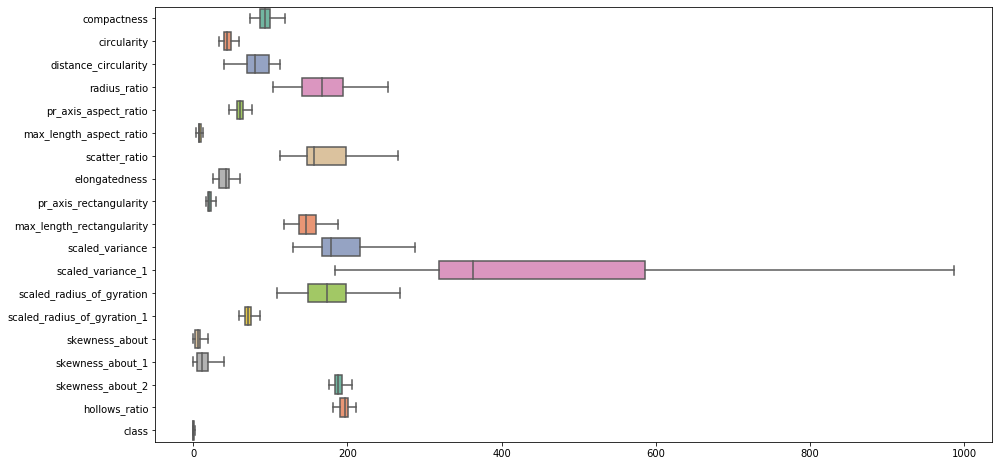

In [108]:
#Visualize if any outliers still exist
plt.figure(figsize=(15,8))
sns.boxplot(data=vehicle_df_new, orient="h", palette="Set2", dodge=False)

We have succesfully eliminated all the outliers from our dataframe. Now we can look into the correlation of the attributes.

### Correlation Visualization

In [109]:
vehicle_df_new.corr()

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr_axis_aspect_ratio            0.192864     0.203253              0.244332   
max_length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr_axis_rectangularity          0.813694     0.843400              0.893025   
max_length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance_1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration_1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about_1                0.156348    -0.009666              0.262345   
skewness_about_2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.297774    -0.251281             -0.428523   

                             radius_ratio  pr_axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr_axis_aspect_ratio             0.650554              1.000000   
max_length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr_axis_rectangularity           0.744139              0.163047   
max_length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance_1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration_1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about_1                 0.179601             -0.021088   
skewness_about_2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.444101             -0.062981   

                             max_length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr_axis_aspect_ratio                        0.150295       0.194195   
max_length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr_axis_rectangularity                      0.487931       0.989751   
max_length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance_1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration_1                -0.335444       0.011314   
skewness_about                            

In [110]:
# We can capture the attributes with correlation greater than 95%
corr_matrix = vehicle_df_new.corr().abs()
high_corr_var=np.where(corr_matrix>0.95)
high_corr_var=[(corr_matrix.columns[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('circularity', 'max_length_rectangularity'),
 ('scatter_ratio', 'elongatedness'),
 ('scatter_ratio', 'pr_axis_rectangularity'),
 ('scatter_ratio', 'scaled_variance'),
 ('scatter_ratio', 'scaled_variance_1'),
 ('pr_axis_rectangularity', 'scaled_variance_1')]

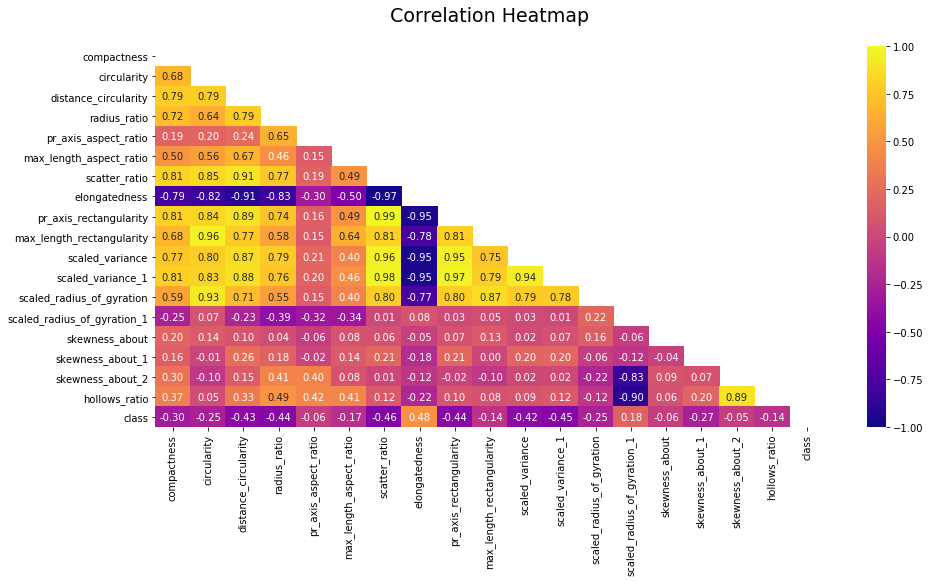

In [113]:
mask = np.zeros_like(vehicle_df_new.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(15,7))
plt.title('Correlation Heatmap', y=1.05, size=19)
sns.heatmap(vehicle_df_new.corr(),vmin=-1, cmap='plasma',annot=True,  mask=mask, fmt='.2f')

**Observation**: We can observe that there are many highly correlated attributes such as scatter_ratio and scaled_variation, pr_axis_rectangularity also circularity and max_lenght_rectangularity and many more. <br> 
We have the option to either drop such high correlations or to go with dimension reduction techniques such as Principal Component Analysis (**PCA)**. 

### Splitting Data into Independent and Dependent 

In [114]:
# Dropping class variable
X    = vehicle_df_new.drop('class', axis =1)
y    = vehicle_df_new['class']

In [115]:
X.shape

(846, 18)

In [116]:
y.shape

(846,)

In [117]:
#Standardization
X_scaled = X.apply(zscore)

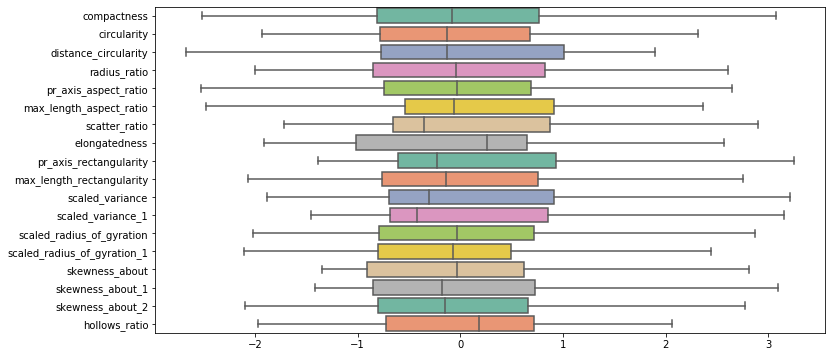

In [118]:
plt.figure(figsize=(12,6))
sns.boxplot(data=X_scaled, orient="h", palette="Set2", dodge=False)

We can see the rescaled data with μ=0 and σ=1

In [120]:
#Spliting
X_train,X_test,y_train,y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=7)

In [121]:
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

x train data (592, 18)
y train data (592,)
x test data  (254, 18)
y test data  (254,)


In [126]:
# prepare cross validation and array nomenclature (Note that random_state while splitting the data should be same as 
# the seed for k fold cross validation. Here we will use 10 splits)
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
kfold
cv_results = []  # to store cross validation result 
model_names = [] # to store each model name
models_results = [] # to store the model final result with accuracy, precisio, recall, f1-score and cv_results
target_names = ['car', 'bus', 'van']

C:\Users\Shueyb\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


### Support Vector Machine (SVM) with original data

In [124]:
#Using GridSearch Cross-Validation to identify the best Hyperparameters
svm_model = SVC(gamma="scale")
params = {'kernel': ['linear', 'rbf'], 'C':[0.01, 0.1, 0.5, 1]}
gridSearch_model = GridSearchCV(svm_model, param_grid=params, cv=5)
gridSearch_model.fit(X_train, y_train)
print("Best Hyper Parameters:\n", gridSearch_model.best_params_)

Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}


In [129]:
rawData_svm = SVC(C = 1, kernel = 'rbf', gamma= "auto")
rawData_svm.fit(X_train, y_train)

# Predicting for test set
rawData_svm_y_predicted     = rawData_svm.predict(X_test)
rawData_svm_Score           = rawData_svm.score(X_test, y_test)
rawData_svm_Accuracy        = accuracy_score(y_test, rawData_svm_y_predicted)

rawData_svm_classification_Report = metrics.classification_report(y_test, rawData_svm_y_predicted,  target_names=target_names)
rawData_svm_classification_Report_dict = metrics.classification_report(y_test, rawData_svm_y_predicted, target_names=target_names, output_dict=True)

rawData_svm_precision_weightedAvg   =   rawData_svm_classification_Report_dict['weighted avg']['precision']
rawData_svm_recall_weightedAvg      =   rawData_svm_classification_Report_dict['weighted avg']['recall']
rawData_svm_f1_score_weightedAvg    =   rawData_svm_classification_Report_dict['weighted avg']['f1-score']

rawData_svm_confusion_matrix = metrics.confusion_matrix(y_test, rawData_svm_y_predicted)

print('\nRawData SVM: \n', rawData_svm_confusion_matrix)
print('\nRawData SVM classification Report : \n', rawData_svm_classification_Report)


# Cross Validation 
rawData_svm_cross_validation_result = model_selection.cross_val_score(rawData_svm, X_scaled, y, cv=kfold, scoring='accuracy')

cv_results.append(rawData_svm_cross_validation_result)
model_names.append('RawData-SVM')

rawData_svm_model_results = pd.DataFrame([['RawData SVM (RBF)', 'No', rawData_svm_Accuracy, rawData_svm_precision_weightedAvg, rawData_svm_recall_weightedAvg,
                                   rawData_svm_f1_score_weightedAvg, rawData_svm_cross_validation_result.mean(), 
                                   rawData_svm_cross_validation_result.std()]], 
                              columns = ['Model', 'PCA',  'Accuracy', 'Precision', 'Recall',
                                         'F1-Score', 'CV Mean', 'CV Std Deviation'])

models_results = rawData_svm_model_results
models_results


RawData SVM: 
 [[124   1   2]
 [  1  65   0]
 [  1   1  59]]

RawData SVM classification Report : 
               precision    recall  f1-score   support

         car       0.98      0.98      0.98       127
         bus       0.97      0.98      0.98        66
         van       0.97      0.97      0.97        61

    accuracy                           0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254



Model PCA  Accuracy  Precision    Recall  F1-Score   CV Mean  \
0  RawData SVM (RBF)  No  0.976378   0.976433  0.976378  0.976383  0.956261   

   CV Std Deviation  
0          0.021784

We get an accuracy of about 97.6% which is an exceptional result. Now we will perform PCA to reduce the number of dimension and see if we can get a better result.  

### Pricipal Component Analysis (PCA)

First step is creating a covariance matrix. Since we have 18 independent variables, the covariance matrix will be 18x18.

In [130]:
covMatrix = np.cov(X_scaled, rowvar=False)
print('Covarinace Matrix Shape:', covMatrix.shape)
print('Covarinace Matrix:\n', covMatrix)

Covarinace Matrix Shape: (18, 18)
Covarinace Matrix:
 [[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00

In [131]:
eig_vals, eig_vecs = np.linalg.eig(covMatrix)
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

We will now find the Eigen Vectors and Eigen Values:

In [132]:
pca = PCA(n_components=18)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Eigen Values**:

In [133]:
print(pca.explained_variance_)

[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 4.01448646e-02 3.22758478e-02 2.93936408e-02 2.27005257e-02
 1.98136761e-02 5.16287320e-03]


**Eigen Vectors**:

In [134]:
print(pca.components_)

[[ 2.72502890e-01  2.87254690e-01  3.02421105e-01  2.69713545e-01
   9.78607336e-02  1.95200137e-01  3.10523932e-01 -3.09006904e-01
   3.07287000e-01  2.78154157e-01  2.99765086e-01  3.05532374e-01
   2.63237620e-01 -4.19359352e-02  3.60832115e-02  5.87204797e-02
   3.80131449e-02  8.47399995e-02]
 [-8.70435783e-02  1.31621757e-01 -4.61430061e-02 -1.97931263e-01
  -2.57839952e-01 -1.08045626e-01  7.52853487e-02 -1.32299375e-02
   8.75601978e-02  1.22154240e-01  7.72657535e-02  7.15030171e-02
   2.10582046e-01  5.03621577e-01 -1.57663214e-02 -9.27462386e-02
  -5.01621218e-01 -5.07612106e-01]
 [-3.81852075e-02 -2.01146908e-01  6.34621085e-02  5.62851689e-02
  -6.19927464e-02 -1.48957820e-01  1.09042833e-01 -9.08526930e-02
   1.06070496e-01 -2.13684693e-01  1.44599805e-01  1.10343735e-01
  -2.02870191e-01  7.38640211e-02 -5.59173987e-01  6.70680496e-01
  -6.22407145e-02 -4.17053530e-02]
 [ 1.38675013e-01 -3.80554832e-02  1.08954287e-01 -2.54355087e-01
  -6.12765722e-01  2.78678159e-01  5.

**Percentage of variation explained by each eigen Vector**:

In [136]:
print(pca.explained_variance_ratio_)

[5.40993254e-01 1.85931025e-01 6.61651173e-02 6.29154973e-02
 4.90529110e-02 3.69710110e-02 1.76541580e-02 1.26616348e-02
 7.27020705e-03 4.43152841e-03 4.07284383e-03 3.58554935e-03
 2.22763400e-03 1.79098315e-03 1.63104981e-03 1.25964961e-03
 1.09945865e-03 2.86487251e-04]


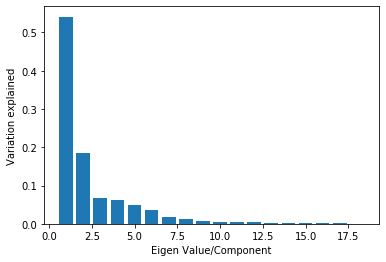

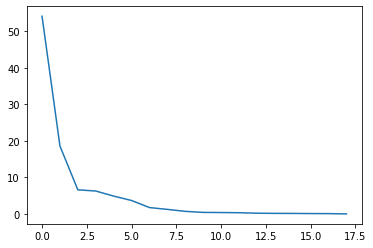

In [137]:
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=1, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value/Component')
plt.show()
plt.plot(var_exp)

**Observation**: We can see a sharp elbow around the 2.5 point on the Eigen Value/Component axis. However, there is also a slight drop in the range 2.5 to 7.5 on the X-axis. After which, there is very little slope observed which means that as the number eigen components increases beyond 7.5, there is no marginal increase in the variation explained. We can confirm this with a ROC diagram as done below.    

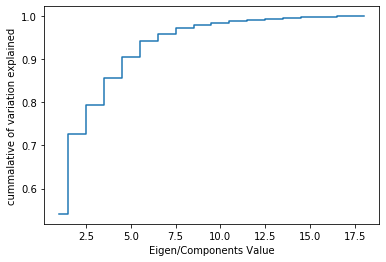

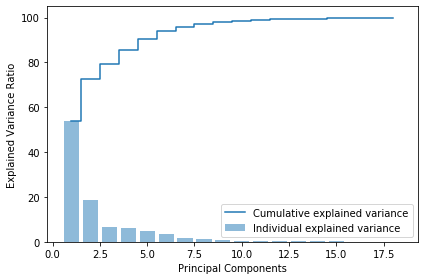

In [138]:
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('cummalative of variation explained')
plt.xlabel('Eigen/Components Value')
plt.show()

# Ploting 
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

**Observation**: This plot tells us that selecting **8 components we can explain approximately 95% of the total variance** of the data.

**PCA with the 8 best components**:

In [139]:
pca_eight_components = PCA(n_components=8)
pca_eight_components.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Transforming out dataframe which has 18 dimensions to 8 dimension:

In [140]:
X_scaled_pca_eight_attr = pca_eight_components.transform(X_scaled)
X_scaled_pca_eight_attr.shape

(846, 8)

Converting PCA Transformed data from Array to Dataframe to visualise in a pairplot:

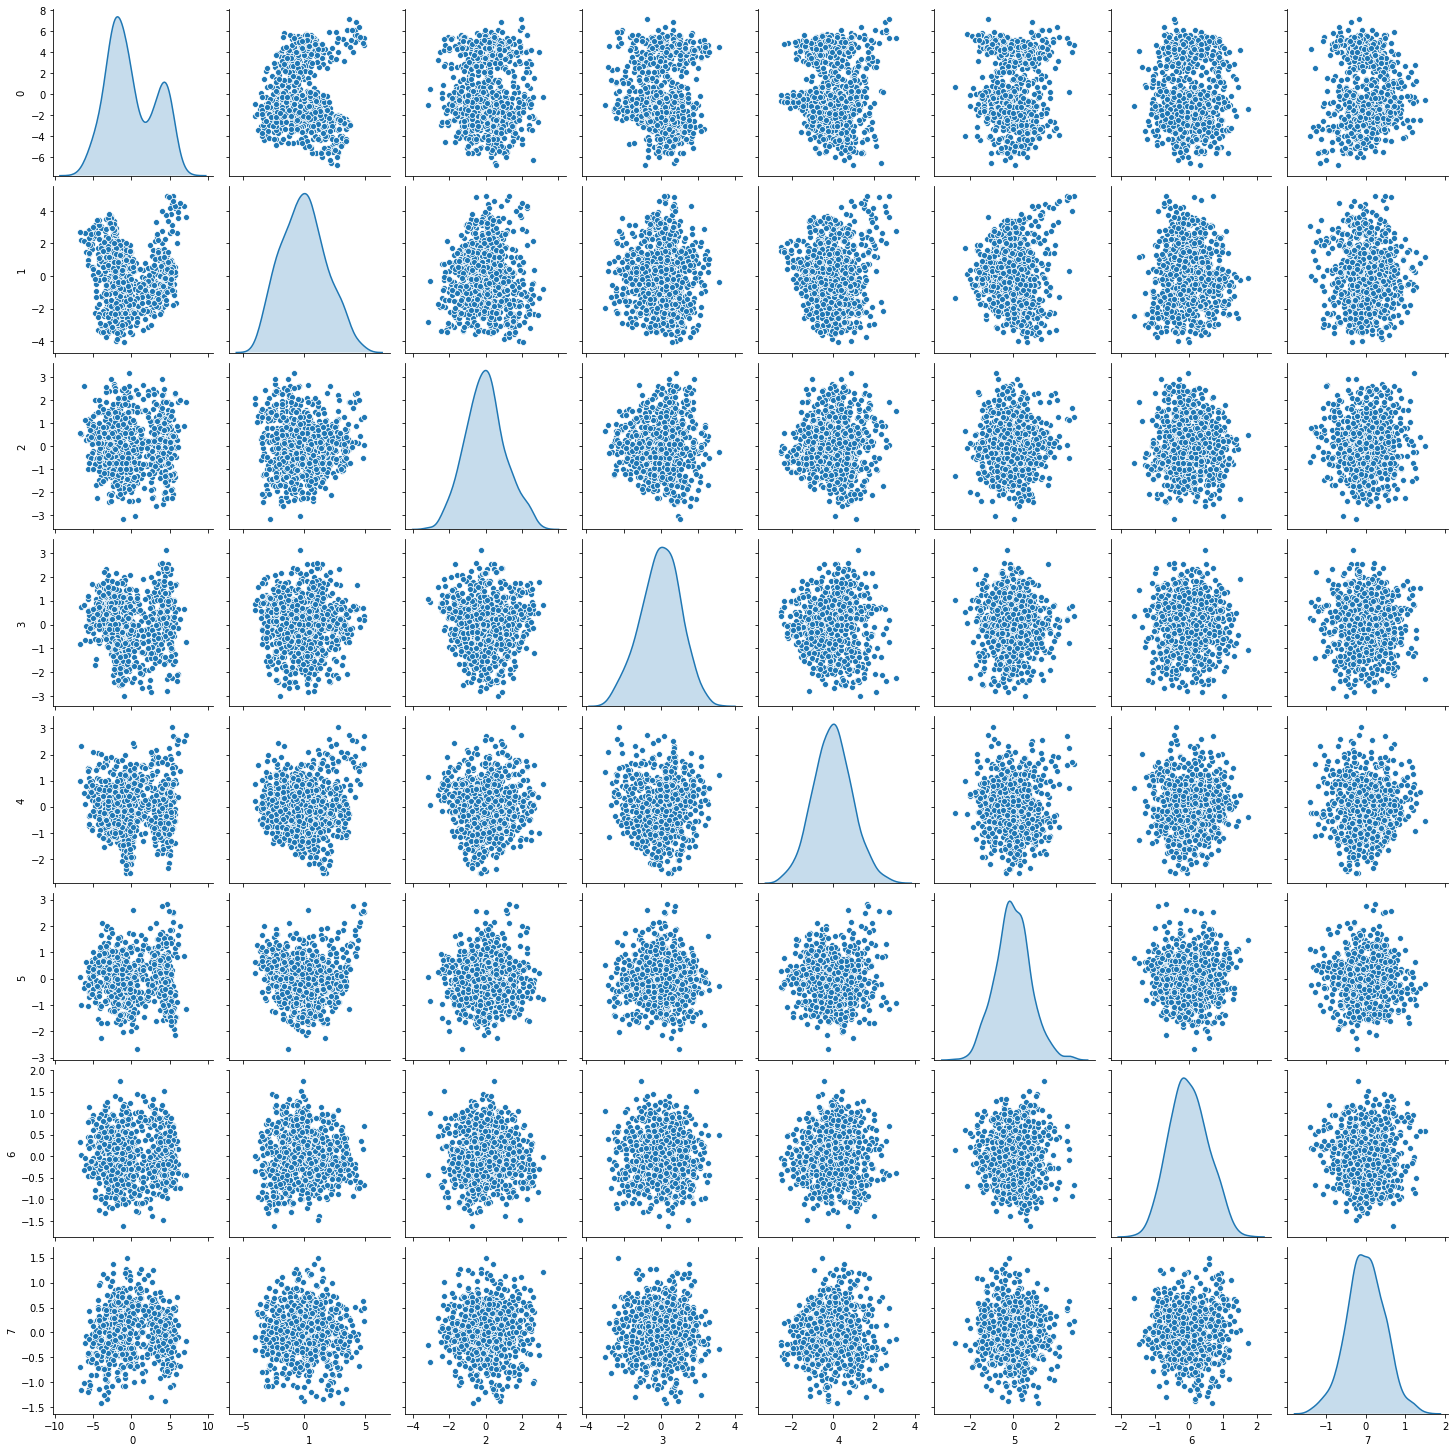

In [142]:
pca_datafram=pd.DataFrame(X_scaled_pca_eight_attr) 
sns.pairplot(pca_datafram, diag_kind = 'kde')

**Observation**: We can see that all the attributes are distributed evenly with no specific relationship. The purpose of our PCA is achieved by reducing the dimensions from 18 to 8. Now we can use this data to train the SVM model and check for the difference. To do so, we will start with splitting our PCA transformed data in train and test sets as below.

In [143]:
#PCA tranfromed data spliting
pca_X_train,pca_X_test,pca_y_train,pca_y_test = train_test_split(X_scaled_pca_eight_attr, y, test_size=0.30, random_state=7)

In [144]:
print('-----------------------Origina Data----------------------------- \n')
print('x train data {}'.format(X_train.shape))
print('y train data {}'.format(y_train.shape))
print('x test data  {}'.format(X_test.shape))
print('y test data  {}'.format(y_test.shape))

print('\n\n-----------------------PCA Transformed Data-----------------------------\n')

print('x train data {}'.format(pca_X_train.shape))
print('y train data {}'.format(pca_y_train.shape))
print('x test data  {}'.format(pca_X_test.shape))
print('y test data  {}'.format(pca_y_test.shape))

-----------------------Origina Data----------------------------- 

x train data (592, 18)
y train data (592,)
x test data  (254, 18)
y test data  (254,)


-----------------------PCA Transformed Data-----------------------------

x train data (592, 8)
y train data (592,)
x test data  (254, 8)
y test data  (254,)


### SVM with PCA 

In [145]:
#Using GridSearch Cross-Validation to identify the best Hyperparameters
svm_model = SVC(gamma="scale")
params = {'kernel': ['linear', 'rbf'], 'C':[0.01, 0.1, 0.5, 1]}
gridSearch_model = GridSearchCV(svm_model, param_grid=params, cv=5)
gridSearch_model.fit(X_scaled_pca_eight_attr, y)
print("Best Hyper Surface Parameters found by GridSearch:\n", gridSearch_model.best_params_)

Best Hyper Surface Parameters found by GridSearch:
 {'C': 1, 'kernel': 'rbf'}


In [146]:
pca_svm = SVC(C = 1, kernel = 'rbf', gamma= "auto")
pca_svm.fit(pca_X_train, pca_y_train)

# Predicting for test set
pca_svm_y_predicted            = pca_svm.predict(pca_X_test)
pca_svm_Score                = pca_svm.score(pca_X_test, pca_y_test)
pca_svm_Accuracy        = accuracy_score(pca_y_test, pca_svm_y_predicted)

pca_svm_classification_Report = metrics.classification_report(pca_y_test, pca_svm_y_predicted,  target_names=target_names)
pca_svm_classification_Report_dict = metrics.classification_report(pca_y_test, pca_svm_y_predicted, target_names=target_names, output_dict=True)

pca_svm_precision_weightedAvg   = pca_svm_classification_Report_dict['weighted avg']['precision']
pca_svm_recall_weightedAvg      = pca_svm_classification_Report_dict['weighted avg']['recall']
pca_svm_f1_score_weightedAvg    = pca_svm_classification_Report_dict['weighted avg']['f1-score']

pca_svm_confusion_matrix = metrics.confusion_matrix(pca_y_test, pca_svm_y_predicted)
print('\nPCA SVM: \n', pca_svm_confusion_matrix)

print('\nPCA SVM classification Report : \n', pca_svm_classification_Report)

# Cross Validation 
pca_svm_cross_validation_result = model_selection.cross_val_score(pca_svm, X_scaled_pca_eight_attr, y, cv=kfold, scoring='accuracy')

cv_results.append(pca_svm_cross_validation_result)
model_names.append('PCA-SVM')

pca_svm_model_results = pd.DataFrame([['PCA SVM (RBF)', 'Yes', pca_svm_Accuracy, pca_svm_precision_weightedAvg, pca_svm_recall_weightedAvg,
                                       pca_svm_f1_score_weightedAvg,pca_svm_cross_validation_result.mean(), 
                                       pca_svm_cross_validation_result.std()]], 
                              columns = ['Model', 'PCA', 'Accuracy', 'Precision', 'Recall',
                                         'F1-Score', 'CV Mean', 'CV Std Deviation'])

models_results = models_results.append(pca_svm_model_results, ignore_index=True)
models_results


PCA SVM: 
 [[123   1   3]
 [  1  65   0]
 [  3   2  56]]

PCA SVM classification Report : 
               precision    recall  f1-score   support

         car       0.97      0.97      0.97       127
         bus       0.96      0.98      0.97        66
         van       0.95      0.92      0.93        61

    accuracy                           0.96       254
   macro avg       0.96      0.96      0.96       254
weighted avg       0.96      0.96      0.96       254



Model  PCA  Accuracy  Precision    Recall  F1-Score   CV Mean  \
0  RawData SVM (RBF)   No  0.976378   0.976433  0.976378  0.976383  0.956261   
1      PCA SVM (RBF)  Yes  0.960630   0.960577  0.960630  0.960485  0.951527   

   CV Std Deviation  
0          0.021784  
1          0.012384

### Result Discussion

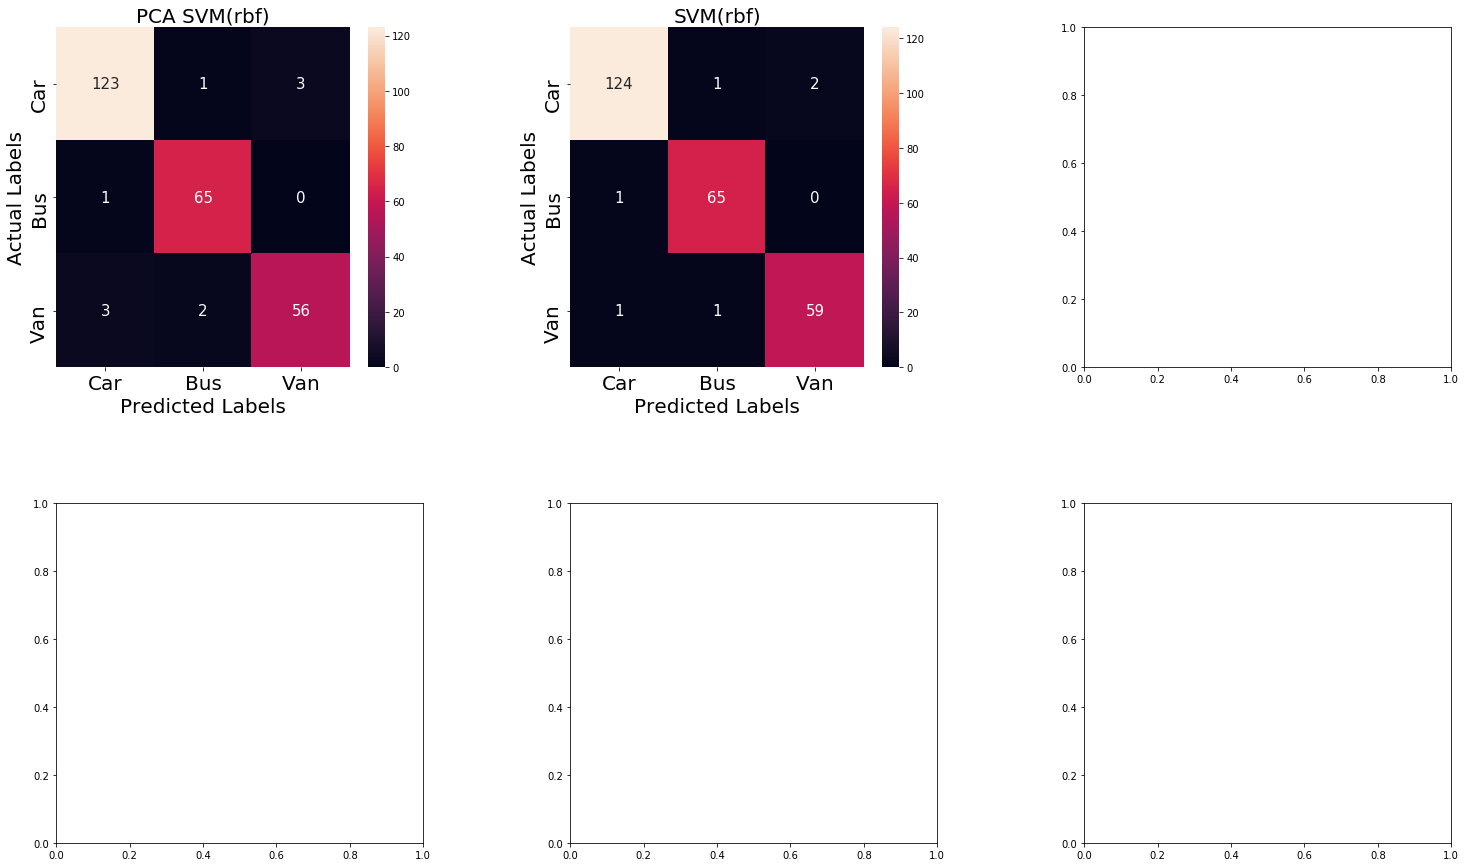

In [166]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (25,15))

# Confusion matrix for SVM with PCA transformed data and SVM with Raw data

cm    = metrics.confusion_matrix(pca_y_test, pca_svm_y_predicted, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index = [i for i in ["Car","Bus", "Van"]],
                  columns = [i for i in ["Car","Bus", "Van"]])
sns.heatmap(df_cm, annot=True , annot_kws={'size': 15}, fmt='g', ax = axs[0,0])
axs[0,0].tick_params(labelsize=20)
axs[0,0].set_xlabel('Predicted Labels', fontsize=20);
axs[0,0].set_ylabel('Actual Labels', fontsize=20); 
axs[0,0].set_title('PCA SVM(rbf)', fontsize=20); 


cm    = metrics.confusion_matrix(y_test, rawData_svm_y_predicted, labels=[0, 1, 2])
df_cm = pd.DataFrame(cm, index = [i for i in ["Car","Bus", "Van"]],
                  columns = [i for i in ["Car","Bus", "Van"]])
sns.heatmap(df_cm, annot=True , annot_kws={'size': 15}, fmt='g', ax = axs[0,1])
axs[0,1].tick_params(labelsize=20)
axs[0,1].set_xlabel('Predicted Labels', fontsize=20);
axs[0,1].set_ylabel('Actual Labels', fontsize=20); 
axs[0,1].set_title('SVM(rbf)', fontsize=20);


plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.show()

In [173]:
models_results

Model  PCA  Accuracy  Precision    Recall  F1-Score   CV Mean  \
0  RawData SVM (RBF)   No  0.976378   0.976433  0.976378  0.976383  0.956261   
1      PCA SVM (RBF)  Yes  0.960630   0.960577  0.960630  0.960485  0.951527   

   CV Std Deviation  
0          0.021784  
1          0.012384

We have total 254 test data out of which 127 cars, 66 buses and 61 vans.<br>

**RawData SVM**<br>
We got an accuracy of **97.6% for Car** i.e (124/127 * 100)<br>
We got an accuracy of **98.4% for Bus** i.e (65/66 * 100)<br>
We got an accuracy of **96.7% for Van** i.e (59/61 * 100)<br><br>
**PCA SVM**<br>
We got an accuracy of **96.8% for Car** i.e (123/127 * 100)<br>
We got an accuracy of **98.4% for Bus** i.e (65/66 * 100)<br>
We got an accuracy of **91.8% for Van** i.e (56/61 * 100)<br><br>
Difference in accuracy is only about 1.5% between Raw data and PCA data. Whereas, the difference in CV Mean is merely 0.5%.<br>
Also, PCA makes our data abstract where we cannot really make interpretations with the findings.<br>
Hence, we can conclude that both the cases are very close, however, **SVM using raw data is better here than using PCA data**.<br>
